In [8]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
%matplotlib inline

In [2]:
# I will be plotting the graph of the recent Warriors Thunder Game 3.
url='http://www.basketball-reference.com/boxscores/pbp/201605220OKC.html'
r=requests.get(url)
soup=BeautifulSoup(r.content,"html.parser")
title=soup.find("h1").text
date_of_game=url[-13:-11]+'/'+url[-11:-9]+'/'+url[-15:-13]
title=title[:title.index(' Play')]
data_list = []
for l in soup.find_all("tr"):
    if len(l.find_all("td"))==6:
        for i in l.find_all("td"):
            data_list.append(i.text)

data_list=data_list[12:]

In [3]:
# Data Wrangling
outfile = open("Temp_file.txt","w")
for i in range(0,len(data_list),6):
	j=i
	while j < i+5:
		outfile.write(data_list[j].encode('utf-8')+'\t')
		j+=1
	outfile.write(data_list[j].encode('utf-8')+'\n')

outfile.close()

fhand = open("Temp_file.txt")
fh=fhand.read()
Time = []
Hm_Pts=[]
Aw_Pts=[]

In [4]:
#More Wrangling..
fh =re.sub('\xa0',' ',fh)
fh =re.sub('\xc2',' ',fh)
fh=re.sub(r'\t(\d+)-(\d+)\t',r'\t\1\t\2\t',fh)
list=fh.split('\n')
for i,line in enumerate(list):
    list[i]=line.split('\t')
list=list[:-1]
file_array = np.array(list)
Aw_Pts=file_array.T[3].astype(int)
Hm_Pts=file_array.T[4].astype(int)

Time=file_array.T[0]
New_T=[]
for i in Time:
	New_T.append(i)
Q=[]
for i,l in enumerate(New_T):
	if re.match('\d\d:\d\d.\d',l):
		continue
	else:
		New_T[i]='0'+l
j=0
for i,l in enumerate(New_T):
	if int(l[:2])<=int(New_T[i-1][:2]):
		Q.append(j)
		continue
	else:
		Q.append(j+1)
		j+=1
		continue

Quarter=np.array(Q)



In [5]:
# functions
def new_time(T,Q):
    #makes an array with the new time
    time_elapsed=[]
    for i in range(len(T)):
        min = int(T[i][:2])
        sec = int(T[i][3:5])
        if Q[i]<5:
            min_elapsed = 11-min
            frac_min=round(float(60-sec)/60,4)
            t=12*(Q[i]-1)+min_elapsed+frac_min
            time_elapsed.append(t)
        else:
            min_elapsed=4-min
            frac_min=round(float(60-sec)/60,4)
            t=48+5*(Q[i]-5)+min_elapsed+frac_min
            time_elapsed.append(t)
    return time_elapsed

Time=new_time(New_T,Q)


In [6]:
# Plot game function
def plot_game():
    y1=Hm_Pts
    y2=Aw_Pts
    xmin=Time
    xmax=np.pad(xmin,((0,1)),mode='constant')[1:]
    xmax[-1]=Time[-1]
    ax=plt.gca()
    #ax.set_axis_bgcolor('black')
    #ax.set_axis_bgcolor((1, 0, 0))
    #plt.figure(facecolor='black')
    plt.hlines(y1,xmin,xmax,colors='r',label='Home')
    plt.hlines(y2,xmin,xmax,colors='g',label='Away')
    plt.xlabel('Minutes Elapsed')
    plt.ylabel('Points Scored')
    plt.axis([0,48,0,140])
    plt.xticks(range(0,60,12))
    plt.yticks(range(0,150,10))
    plt.legend(loc=2)
    plt.title(title+', '+date_of_game)
    plt.show()



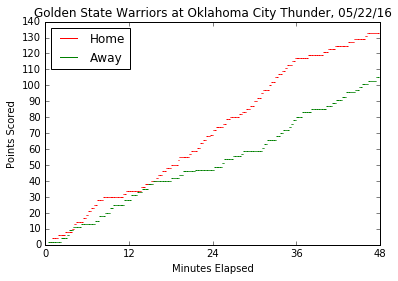

In [9]:
plot_game()